In [211]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random

beePalette = ["#edd132", "#000000"]
flowerPalette = ["#b3de69", "#fb8072"]
sb.set(style="ticks")

beeList = []
flowerList = []
with open("bees.csv", "r") as bees:
    for line in bees:
        beeList.append(line.strip().split(','))
        
with open("flowers.csv", "r") as flowers:
    for line in flowers:
        flowerList.append(line.strip().split(','))
        
beeArray = np.array(beeList)
flowerArray = np.array(flowerList)

beeGenes = beeList[0][5:13]
flowerGenes = flowerList[0][5:10]

beeFrame = pd.DataFrame(beeArray)
flowerFrame = pd.DataFrame(flowerArray)

beeFrame.columns = beeList[0]
beeFrame = beeFrame[1:]
beeFrame[beeGenes+["Replicate", "Generation"]] = beeFrame[beeGenes+["Replicate", "Generation"]].apply(pd.to_numeric)
beePlotFrame = beeFrame.groupby(by=["Replicate", "Generation", "Treatment"])[beeGenes].mean().reset_index()

flowerFrame.columns = flowerList[0]
flowerFrame = flowerFrame[1:]
flowerFrame[flowerGenes+["Replicate", "Generation"]] = flowerFrame[flowerGenes+["Replicate", "Generation"]].apply(pd.to_numeric)
flowerPlotFrame = flowerFrame.groupby(by=["Replicate", "Generation", "Treatment"])[flowerGenes].mean().reset_index()

#plot that shows nectar capacity averages over fitness and controls
#also show the parent nectar collecteds
def FitnessExample():
    fig, axis = plt.subplots(1,1)
    aggNectar = beeFrame.groupby(by=["Replicate", "Generation", "Treatment"])["ParentNectar"].sum().reset_index()
    sb.lineplot(x="Generation", y="ParentNectar", hue="Treatment", data=aggNectar, legend="brief", palette=beePalette, ax=axis)
    axis.set_title("Succesful Flower Visits", weight="bold", fontsize=14)
    axis.set_ylabel("Flower Visits")

    fig.patch.set_alpha(0)
    axis.patch.set_alpha(0)
    
    sb.despine()
    plt.show()
    
#pie chart showing roulette reproduction 
def RouletteExample():
    fig, axis = plt.subplots(1,2, figsize=(15,15))

    offspring = [8,7,6,5,4,3,2,1]
    labels=["Champion Bee", "'second is the best' Bee", "Still made the podium Bee", "the bee the lord told to come forth", "Everton Bee", "I'm running out of ideas Bee", "Penultimate Bee", "Better luck next time Bee"]
    plot, text, autotexts = axis[0].pie(offspring, shadow=True, colors=sb.color_palette("Set3", 8), autopct="")

    for i, item in enumerate(autotexts):
        item.set_text("{}".format(offspring[i]))

    axis[0].legend(labels, loc="upper right")
    axis[0].set_title("Offspring per Bee", weight="bold", fontsize=14)

    population=[]
    populationSize=8
    for i in range(populationSize):
        for j in range(populationSize-i):
            population.append(labels[i])

    random.shuffle(population)
    kids = population[:8]

    kidDict = {"Champion Bee":0, 
               "'second is the best' Bee":0, 
               "Still made the podium Bee":0, 
               "the bee the lord told to come forth":0, 
               "Everton Bee":0, 
               "I'm running out of ideas Bee":0, 
               "Penultimate Bee":0, 
               "Better luck next time Bee":0}

    for parent in kids:
        kidDict[parent]+=1

    plot, text, autotexts = axis[1].pie(kidDict.values(), shadow=True, colors=sb.color_palette("Set3", 8), autopct="")

    for i, item in enumerate(autotexts):
        if(list(kidDict.values())[i] >0):
            item.set_text("{}".format(list(kidDict.values())[i]))

    axis[1].legend(labels=labels, loc="upper left")
    axis[1].set_title("Offspring Released", weight="bold", fontsize=14)

    fig.patch.set_alpha(0)
    axis[0].patch.set_alpha(0)
    axis[1].patch.set_alpha(0)

    
    plt.tight_layout()
    plt.show()

#plots showing bee evolution results (positive)
def BeeSelection():
    fig, axes = plt.subplots(1,3, figsize=(15,7), sharex=True)
    
    PlotAllReplicates(beePlotFrame, "NectarCapacity", axes[0])
    axes[0].set_title("Nectar Capacity", weight="bold", fontsize=14)
    axes[0].set_ylabel("Flower Visits Before Returning to Hive")
    
    PlotAllReplicates(beePlotFrame, "Speed", axes[1])
    axes[1].set_title("Speed", weight="bold", fontsize=14)
    axes[1].set_ylabel("Speed")

    PlotAllReplicates(beePlotFrame, "Sight", axes[2])
    axes[2].set_title("Sight", weight="bold", fontsize=14)
    axes[2].set_ylabel("Range of Sight")

    fig.patch.set_alpha(0)
    axes[0].patch.set_alpha(0)
    axes[1].patch.set_alpha(0)
    axes[2].patch.set_alpha(0)

    plt.tight_layout()
    sb.despine()

#plots of bee evolution flops & drift
def BeeNoSelection():
    fig, axes = plt.subplots(2,2, figsize=(10,10), sharex=True)
    
    PlotAllReplicates(beePlotFrame, "ReleaseRate", axes[0][0])
    axes[0][0].set_title("Rate of Release", weight="bold", fontsize=14)
    axes[0][0].set_ylabel("Rate (seconds)")
    
    PlotAllReplicates(beePlotFrame, "Courage", axes[0][1])
    axes[0][1].set_title("Courage", weight="bold", fontsize=14)
    axes[0][1].set_ylabel("Courage")

    PlotAllReplicates(beePlotFrame, "WanderSearch", axes[1][0])
    axes[1][0].set_title("Patience", weight="bold", fontsize=14)
    axes[1][0].set_ylabel("New Flower Search Time (seconds)")

    PlotAllReplicates(beePlotFrame, "Drift", axes[1][1])
    axes[1][1].set_title("Drift", weight="bold", fontsize=14)
    axes[1][1].set_ylabel("")

    fig.patch.set_alpha(0)
    axes[0][0].patch.set_alpha(0)
    axes[0][1].patch.set_alpha(0)
    axes[1][0].patch.set_alpha(0)
    axes[1][1].patch.set_alpha(0)
    
    plt.tight_layout()
    sb.despine()

#plots of flower flops and drift
def FlowerNoSelection():
    fig, axes = plt.subplots(2,2, figsize=(10,10))
    PlotAllReplicates(flowerPlotFrame, "MaximumNectar", axes[0][0])
    axes[0][0].set_title("Nectar Maximum", weight="bold", fontsize=14)
    axes[0][0].set_ylabel("Nectar Maximum")

    PlotAllReplicates(flowerPlotFrame, "RefillRate", axes[0][1])
    axes[0][1].set_title("Refill Rate", weight="bold", fontsize=14)
    axes[0][1].set_ylabel("Rate (seconds)")

    PlotAllReplicates(flowerPlotFrame, "PistilSticky", axes[1][0])
    axes[1][0].set_title("Pollen Receptivity", weight="bold", fontsize=14)
    axes[1][0].set_ylabel("Receptiveness")

    PlotAllReplicates(flowerPlotFrame, "Drift", axes[1][1])
    axes[1][1].set_title("Drift", weight="bold", fontsize=14)
    axes[1][1].set_ylabel("")

    fig.patch.set_alpha(0)
    axes[0][0].patch.set_alpha(0)
    axes[0][1].patch.set_alpha(0)
    axes[1][0].patch.set_alpha(0)
    axes[1][1].patch.set_alpha(0)
    
    plt.tight_layout()
    sb.despine()

#plot of flower coevolution
def PollenStickiness():
    fig, axis = plt.subplots(1,1)
    PlotAllReplicates(flowerPlotFrame, "StamenSticky")
    axis.set_title("Pollen Stickiness", weight="bold", fontsize=14)
    axis.set_ylabel("Stickiness")
    
    fig.patch.set_alpha(0)
    axis.patch.set_alpha(0)
    
    sb.despine()
    
def SingleReplicate():
    data = beeFrame.loc[(beeFrame["Replicate"] == 1)]
    fig, ax = plt.subplots(figsize=(50, 50))
    sb.violinplot(x="Generation", y="Speed", data=data, ax=ax, inner="points")

def PlotAllReplicates(dataset, trait, axis=None):
    palette = flowerPalette
    if(list(dataset)[4]=="NectarCapacity"):
        palette=beePalette 
        
    set1 = dataset.loc[(dataset["Replicate"] == 1) | (dataset["Replicate"] == 2)]
    set2 = dataset.loc[(dataset["Replicate"] == 3) | (dataset["Replicate"] == 4)]
    set3 = dataset.loc[(dataset["Replicate"] == 5) | (dataset["Replicate"] == 6)]

    sb.lineplot(x="Generation", y=trait, hue="Treatment", data=set1, ci=None, legend="brief", palette=palette, ax=axis)
    sb.lineplot(x="Generation", y=trait, hue="Treatment", data=set2, ci=None, legend=False, palette=palette, ax=axis)
    sb.lineplot(x="Generation", y=trait, hue="Treatment", data=set3, ci=None, legend=False, palette=palette, ax=axis)

# Designing Evolution & Coevolution in a Video Game

### Ari Carter

## Backgound

- Peaceful trial for Polymorphic Games
    - Previous games used evolution to beat player
    - Space invaders
- Focused on open-ended game for younger audience

## Evolution
- Organisms want kids
    - Different pressures shape which can have kids
    - Organisms' traits assist, detract, or do nothing
        - Helpful traits promoted
        - Unhelpful traits squished
        - Useless stuff stays around
- Fitness fucntion: a pressure that drives reproduction, trait emphasis

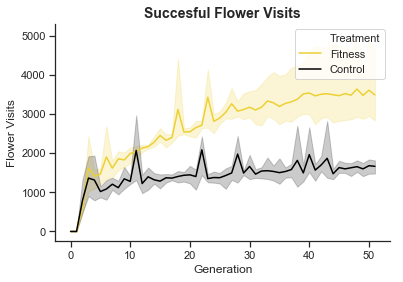

In [178]:
FitnessExample()

## Coevolution Premise
- Pollinators and flowers
    - Usually mutually beneficial
    - Assist each other's reproduction
    - Broadly underlines ecosystem cause/effect
- Serve it up in a video game about cultivating honey
    - Players experience & employ principles
        - Artificial selection!
        - Ecosystem patterns

## Overview
- Genomes determine behavior & aesthetics
- Evolution occurs in rounds
- Niches occur over time
    - Collect 'em all

<img src="beepic.png"/> 

<img src="flowerpic.png"/>

## Bee Operation
- Genome: nectar capacity, sight range, rate of release from hive, courage, patience, speed
- All leave hive when round begins
    - Collect nectar until capacity is reached
    - Return to hive
    - Repeat once rate of release lapsed
- While collecting nectar...
    - Contribute to/access hive memory
    - Find new flowers dependin on courage, patience, sight
    - Distribute pollen
- Reproduce (asexually) at end of round

## Flower Operation
- Genome: Nectar capacity, nectar refill rate, pollen stickiness, pistil stickiness
- Hang out and look appetizing
    - Bees exchange nectar for chance of passing pollen
    - Can also recieve pollen (sexual reproduction)

## Fitness
- Bees playing roulette
    - More nectar, more chance to have kids
- Flowers play similar game
    - More pollen distributed, better chances
- Random mutation during reproduction

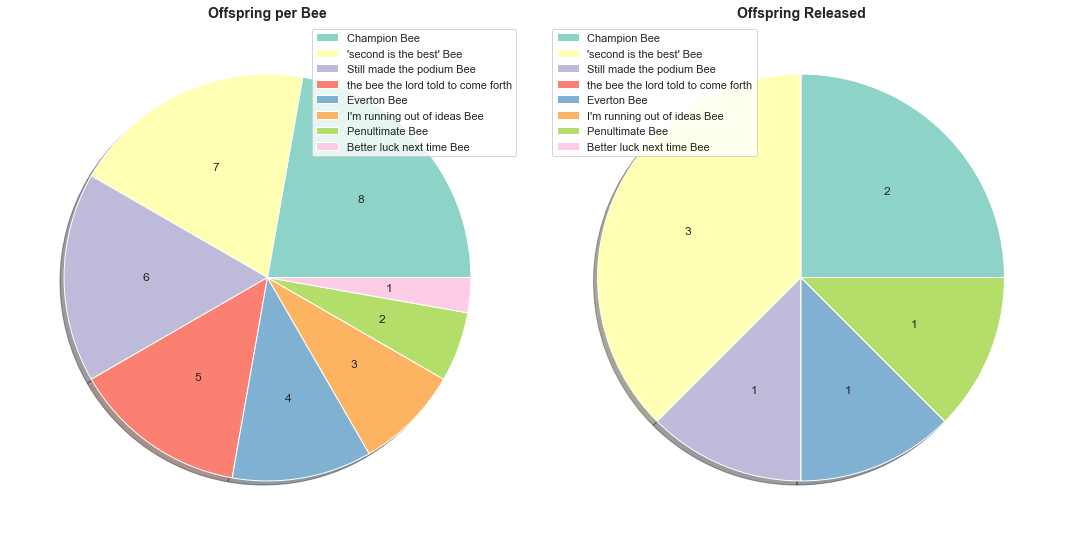

In [199]:
RouletteExample()

## Demonstrating Evolution & Coevolution
- Toggle fitness
    - Do flowers evolve differently if bees are under pressure to evolve?
- Game too chaotic
    - Niches
    - Player
- Controls:
    - 1 hive with 200 bees/generation
    - 200 flowers
    - 50 rounds per replicate
    - Bee fitness function toggled every other replicate

## Evolution Results (Bees)
- Product of conditions
     - Exploration discouraged

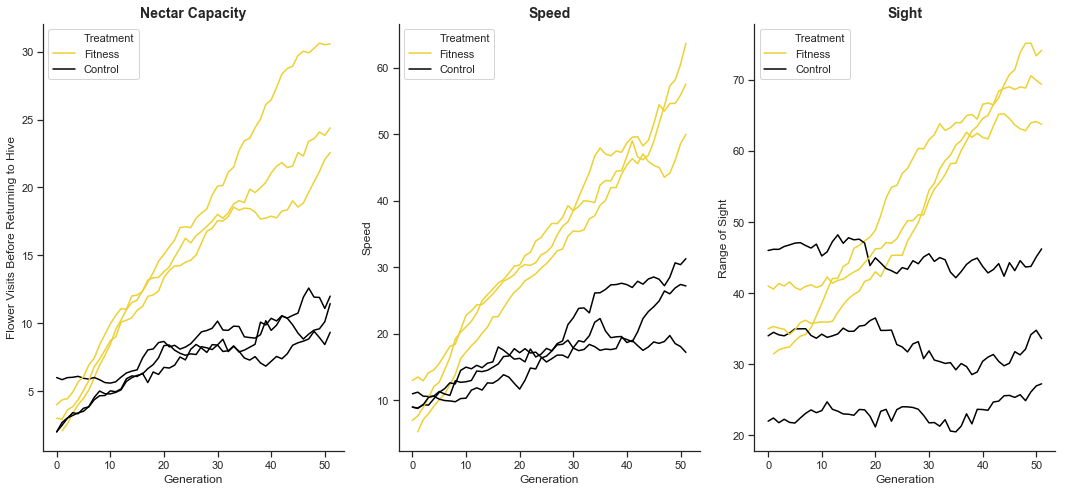

In [200]:
BeeSelection()

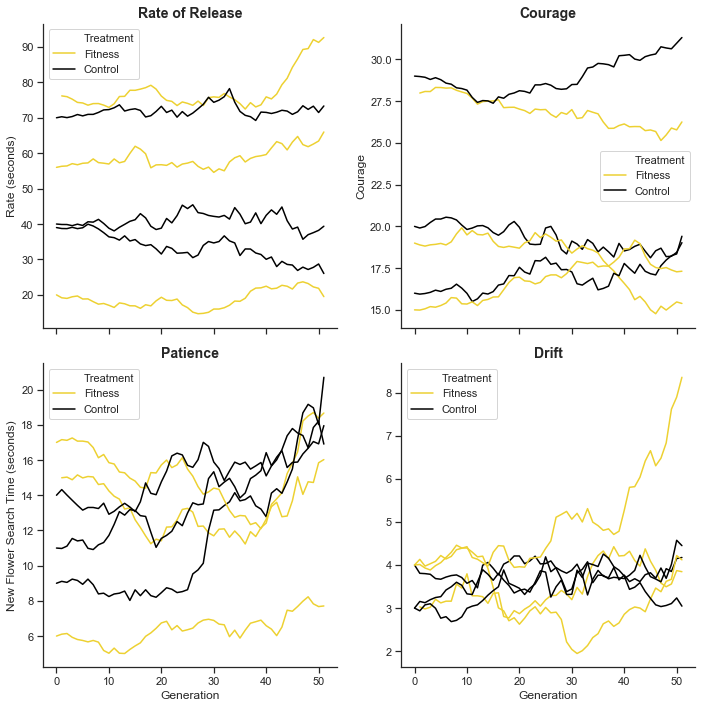

In [212]:
BeeNoSelection()

## Coevolution Results (Flowers)
- Refill rate behaved strange
- Pollen stickiness 

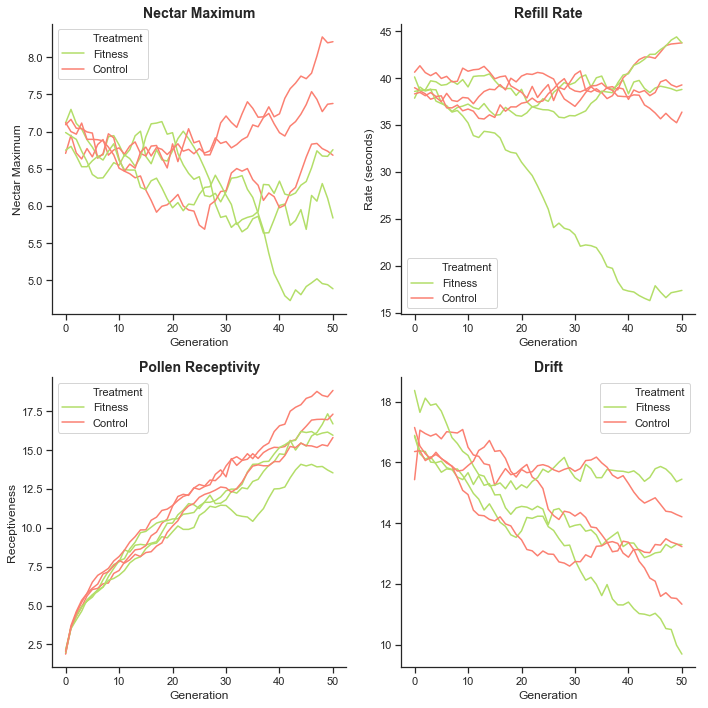

In [213]:
FlowerNoSelection()

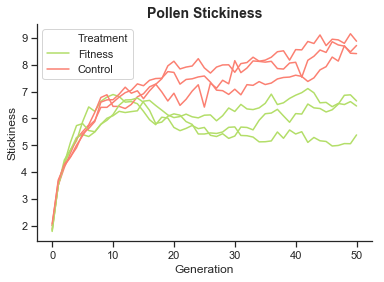

In [214]:
PollenStickiness()

## Conclusions
- Coevolution evidence
- Aritificial selection
    - Educational tool
- Just fun